In [2]:
!pip install tensorflow numpy matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 9.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 15.4 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 15.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 10.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Training data shape:", x_train.shape) 
print("Test data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


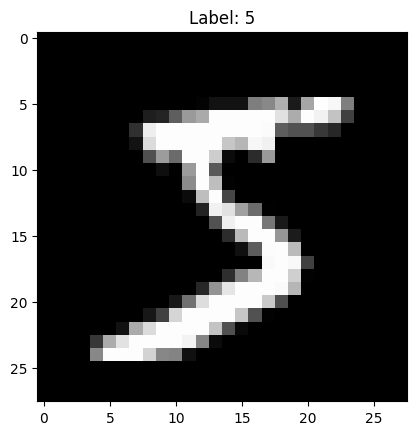

In [7]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [8]:
# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# Reshape images to 1D arrays
x_train = x_train.reshape(-1, 28*28)  
x_test = x_test.reshape(-1, 28*28)    

In [11]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 10 classes (0-9)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),           # Input layer: 784 pixels
    tf.keras.layers.Dense(128, activation='relu'), # Hidden layer: 128 neurons, ReLU
    tf.keras.layers.Dense(10, activation='softmax') # Output layer: 10 classes
])

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8618 - loss: 0.4841 - val_accuracy: 0.9517 - val_loss: 0.1649
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9577 - loss: 0.1416 - val_accuracy: 0.9632 - val_loss: 0.1248
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9729 - loss: 0.0919 - val_accuracy: 0.9707 - val_loss: 0.0965
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9815 - loss: 0.0676 - val_accuracy: 0.9704 - val_loss: 0.0956
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9842 - loss: 0.0508 - val_accuracy: 0.9714 - val_loss: 0.0988


In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.9703 - loss: 0.0970
Test accuracy: 0.9729


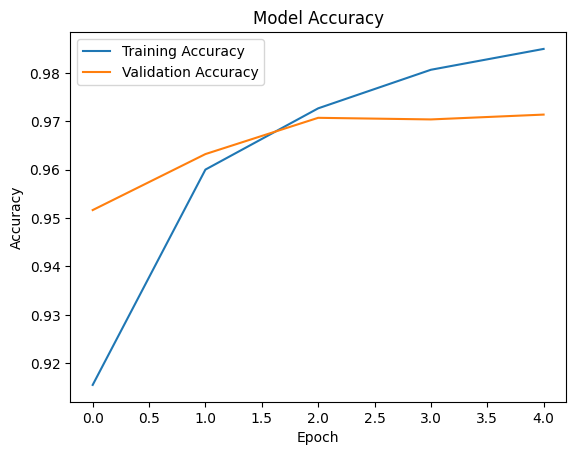

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


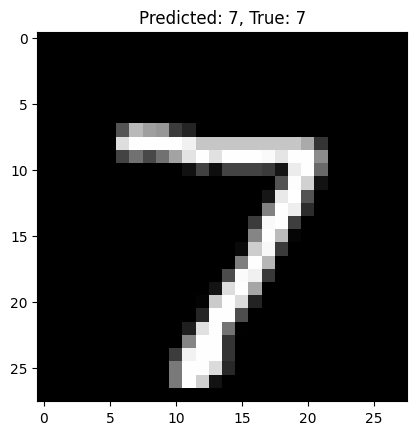

In [19]:
prediction = model.predict(x_test[0:1])
predicted_label = np.argmax(prediction)
true_label = np.argmax(y_test[0])

# Display the image and prediction
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.show()